**Setting up environment**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Extracting the dataset**

In [ ]:
import os
dataset_path = '/content/drive/My Drive/Cats_vs_Dogs/'
os.chdir(dataset_path)


**Unzipping the train.zip File**

In [ ]:
import zipfile

with zipfile.ZipFile('train.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/train')


**Checking the Directory Structure**

In [ ]:
# /content/train/
# ├── cat.0.jpg
# ├── cat.1.jpg
# ├── dog.0.jpg
# └── dog.1.jpg


In [ ]:
train_data_dir = '/content/train/train'  # Update this path if necessary


In [ ]:
import os

train_data_dir = '/content/train'  # Adjust the path if needed
files = os.listdir(train_data_dir)
print("Files in directory:", files)


Files in directory: ['train']


In [ ]:
train_data_dir = '/content/train/train'  # Example if images are in a nested 'train' directory


**Skipping Non-Image Files and Directories**

In [ ]:
import cv2
import numpy as np
import os

IMG_SIZE = 64

def load_data(data_dir):
    images = []
    labels = []
    for img in os.listdir(data_dir):
        if img.endswith('.jpg') or img.endswith('.png'):  # Check if the file is an image
            label = 1 if 'dog' in img else 0  # Label dogs as 1, cats as 0
            img_path = os.path.join(data_dir, img)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                images.append(img)
                labels.append(label)
            else:
                print(f"Warning: Unable to load image {img_path}")
        else:
            print(f"Skipping non-image file: {img}")
    return np.array(images), np.array(labels)

train_data_dir = '/content/train'
X, y = load_data(train_data_dir)


Skipping non-image file: train


**Listing All Files and Directories**

In [ ]:
import os

train_data_dir = '/content/train'
print("Contents of /content/train:")
print(os.listdir(train_data_dir))


Contents of /content/train:
['train']


In [ ]:
train_data_dir = '/content/train/train'  # Adjust to the correct path


**Displaying Images**

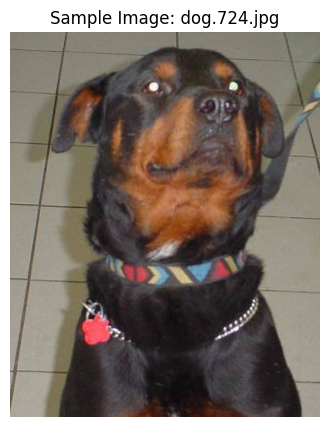

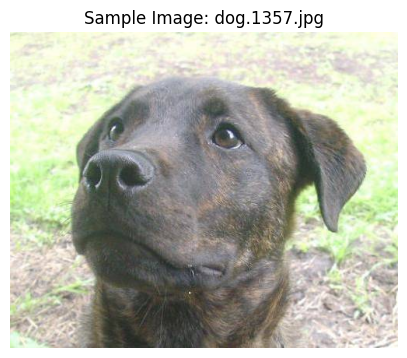

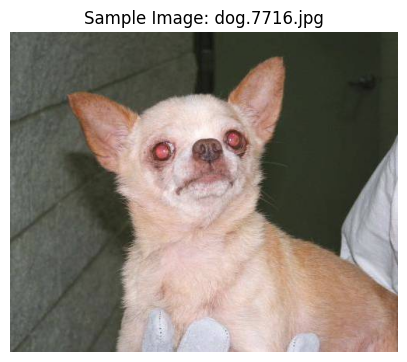

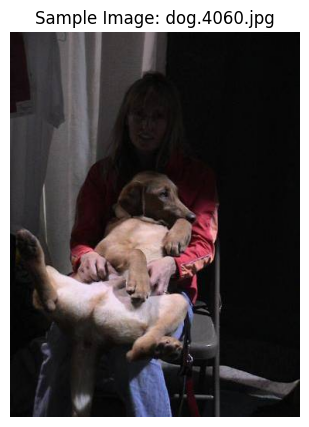

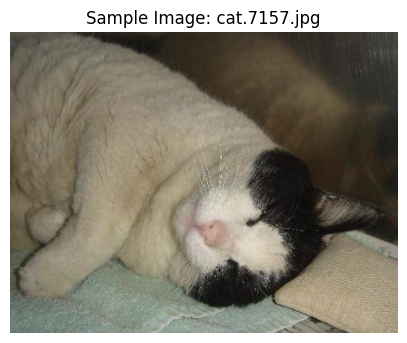

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

def display_sample_images(data_dir, num_images=5):
    images_loaded = 0
    for img in os.listdir(data_dir):
        if img.endswith('.jpg') or img.endswith('.png'):
            img_path = os.path.join(data_dir, img)
            img_data = cv2.imread(img_path)
            if img_data is not None:
                img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
                plt.figure(figsize=(5, 5))
                plt.imshow(img_data)
                plt.title(f"Sample Image: {img}")
                plt.axis('off')
                plt.show()
                images_loaded += 1
            else:
                print(f"Unable to load image {img_path}")
            if images_loaded >= num_images:
                break
        else:
            print(f"Skipping non-image file: {img}")

    if images_loaded == 0:
        print("No images found or unable to load images.")

# Update the path to the correct subdirectory
train_data_dir = '/content/train/train'

# Display sample images
display_sample_images(train_data_dir)
